In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc


In [ ]:

data = pd.read_csv('Depression.csv')

# Preview dataset
print(data.head())
print(data.info())


  1. Age 2. Gender                             3. University  \
0  18-22    Female  Independent University, Bangladesh (IUB)   
1  18-22      Male  Independent University, Bangladesh (IUB)   
2  18-22      Male  Independent University, Bangladesh (IUB)   
3  18-22      Male  Independent University, Bangladesh (IUB)   
4  18-22      Male  Independent University, Bangladesh (IUB)   

                                  4. Department           5. Academic Year  \
0  Engineering - CS / CSE / CSC / Similar to CS  Fourth Year or Equivalent   
1  Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   
2  Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   
3  Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   
4  Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   

  6. Current CGPA  Unnamed: 6  \
0     2.50 - 2.99         NaN   
1     3.80 - 4.00         NaN   
2     3.00 - 3.39         NaN   
3     3.40 - 3

In [ ]:
# Check for missing values
print(data.isnull().sum())


1. Age                                                                                                                                                                     0
2. Gender                                                                                                                                                                  0
3. University                                                                                                                                                              0
4. Department                                                                                                                                                              0
5. Academic Year                                                                                                                                                           0
6. Current CGPA                                                                                                                        

In [ ]:
# Drop columns with high missing values
data = data.drop(columns=['Unnamed: 6'])

In [ ]:
# Check for missing values
print(data.isnull().sum())

1. Age                                                                                                                                                                  0
2. Gender                                                                                                                                                               0
3. University                                                                                                                                                           0
4. Department                                                                                                                                                           0
5. Academic Year                                                                                                                                                        0
6. Current CGPA                                                                                                                                       

In [ ]:
# Identify categorical columns
categorical_cols = ['2. Gender', '3. University', '4. Department', '5. Academic Year', '6. Current CGPA', 'Depression Level:\n1-4 Minimal depression\n5-9 Mild depression\n10-14 Moderate depression\n15-19 Moderately severe depression\n20-27 Severe depression']

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [ ]:
# Target variable and features
X = data.iloc[:, 7:17]  # Select question responses as features
y = data['Depression Level:\n1-4 Minimal depression\n5-9 Mild depression\n10-14 Moderate depression\n15-19 Moderately severe depression\n20-27 Severe depression']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        95
           3       1.00      1.00      1.00       112
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        93

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396

Confusion Matrix:
[[ 71   0   0   0   0   0]
 [  0  16   0   0   0   0]
 [  0   0  95   0   0   0]
 [  0   0   0 112   0   0]
 [  0   0   0   0   9   0]
 [  0   0   0   0   0  93]]


In [ ]:
# Random Forest
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluation
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        95
           3       1.00      1.00      1.00       112
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        93

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396

Confusion Matrix:
[[ 71   0   0   0   0   0]
 [  0  16   0   0   0   0]
 [  0   0  95   0   0   0]
 [  0   0   0 112   0   0]
 [  0   0   0   0   9   0]
 [  0   0   0   0   0  93]]


In [ ]:
# Accuracy Comparison
acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {acc_log}")
print(f"Random Forest Accuracy: {acc_rf}")


Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 1.0


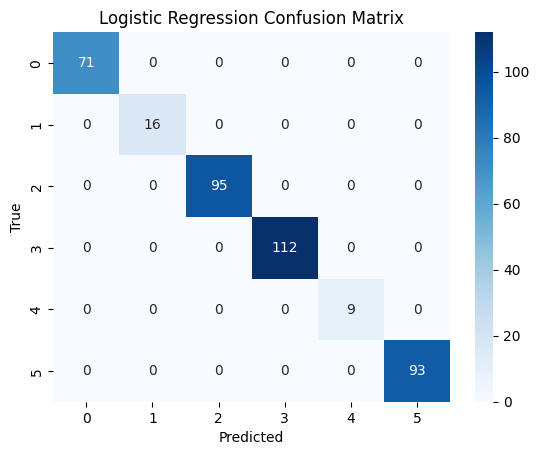

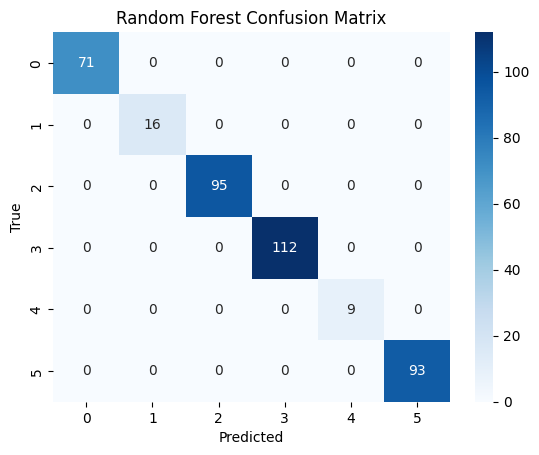

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")


<ipython-input-18-1c992dd2ff55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax1.plot([0, 1], [0, 1], 'k--', label='Random Guess', color='red')
<ipython-input-18-1c992dd2ff55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax2.plot([0, 1], [0, 1], 'k--', label='Random Guess', color='red')


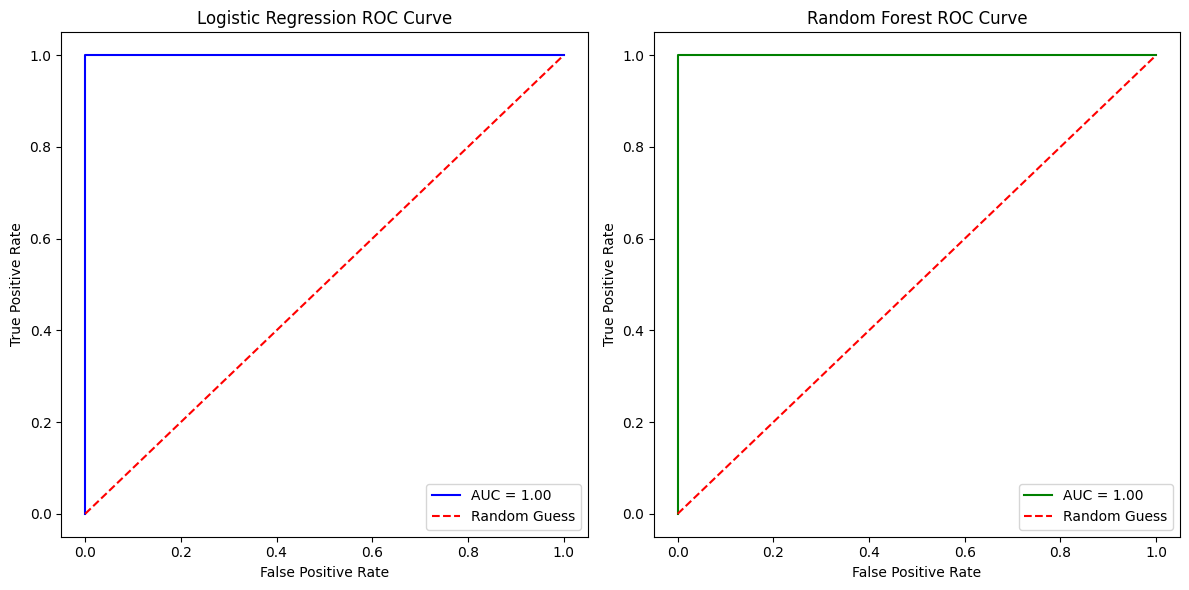

In [ ]:
# Import required library for side-by-side plots
from matplotlib.gridspec import GridSpec

# Create the figure and define grid layout
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, figure=fig)

# Logistic Regression ROC Curve
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(fpr_log, tpr_log, label=f'AUC = {roc_auc_log:.2f}', color='blue')
ax1.plot([0, 1], [0, 1], 'k--', label='Random Guess', color='red')
ax1.set_title('Logistic Regression ROC Curve')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend()

# Random Forest ROC Curve
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(fpr_rf, tpr_rf, label=f'AUC = {roc_auc_rf:.2f}', color='green')
ax2.plot([0, 1], [0, 1], 'k--', label='Random Guess', color='red')
ax2.set_title('Random Forest ROC Curve')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()
